In [1]:
import numpy as np
# import matplotlib.pyplot as plt
%pylab
%matplotlib inline
from mpl_toolkits import mplot3d

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def Projection_B2U(B_vec, u_vec):
    P_u = u_vec @ u_vec.T / (u_vec.T @ u_vec)
    return P_u @ B_vec

# Non-vectorize function 
def Find_diffFre(B_vec, u):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    B_u = Projection_B2U(B_u, u)
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    H_zero = D * (Sz.T @ Sz)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    return eigenval, eigenvec

In [3]:
def Cutoff(x):
    return 1 if x > 0.8 else 0
cutoff = np.vectorize(Cutoff)

In [4]:
def Multi_diffFre(B_vec):
    global u
    for i in range(len(u)) :
        eigVal, eigVec = Find_diffFre(B_vec, u[i])
        max_idx = np.argmax(cutoff(abs(eigVec)), 1)
        sort_eigenVal = eigVal[max_idx]
        if i == 0:
            Frequency = sort_eigenVal
        else:
            Frequency = np.vstack((Frequency, sort_eigenVal))
    return abs(Frequency[:, 0] - Frequency[:, 2]).reshape(-1, 1)

In [5]:
num = int(1e4)
BX_lst = np.linspace(0.0, 50.0, num) / 1000
D = 2.87 # Ghz
gam = 28.8 # Ghz / T

In [6]:
# Spin is correct 
Sx = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]) / np.sqrt(2)
Sy = np.array([[0, -1.j, 0], [1.j, 0, -1.j], [0, 1.j, 0]]) / np.sqrt(2)
Sz = np.array([[1, 0, 0], [0, 0, 0], [0, 0, -1]])
S = np.array((Sx, Sy, Sz))

In [7]:
u1 = np.array([[1], [1], [1]]) / 3 ** (1 / 2)
u2 = np.array([[1], [-1], [-1]]) / 3 ** (1 / 2)
u3 = np.array([[-1], [-1], [1]]) / 3 ** (1 / 2)
u4 = np.array([[-1], [1], [-1]]) / 3 ** (1 / 2)
u = [u1, u2, u3, u4]
u_arr = np.array((u1, u2, u3, u4)).reshape(4, 3)
u_dict = {f'NV_{i}': u[i] for i in range(len(u))}

In [8]:
B_val = 0.05 # 50 mT
theta = 54.735 * np.pi / 180
phi = 45 * np.pi / 180

In [9]:
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.0288673 ]
 [0.0288673 ]
 [0.02886795]]


# Today, Rotating Sx, Sy, Sz when the magnetic field was rotated

In [10]:
def Find_Multi_diffFre(B_vec):
    global gam, D, S, Sz, num
    B_u = B_vec.copy()
    B_u = B_u.T.reshape(num, 3, 1)
    H_mag = gam * np.dot(S.T, B_u).T.reshape(num, 3, 3)
    H_zero = D * (Sz.T @ Sz) 
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag) 
    return eigenval, eigenvec

In [11]:
B_vec = BX_lst * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])

In [12]:
eigenVal, eigenVec = Find_Multi_diffFre(B_vec)

In [13]:
max_idx = np.argmax(cutoff(abs(eigenVec)), 2)
Frequency = np.take_along_axis(eigenVal, max_idx, axis=1)
Fre_plus, Fre_g, Fre_minus = Frequency[:, 0], Frequency[:, 1], Frequency[:, 2]

Text(0.05, 2.7325504755699246, 'v- : 2.7325504755699246 GHz')

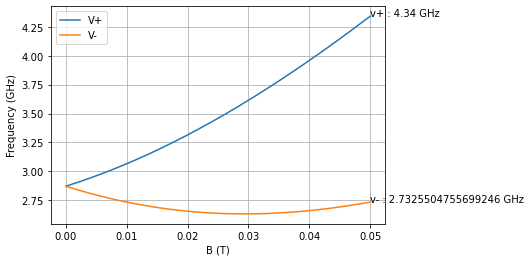

In [14]:
plt.plot(BX_lst, abs(Fre_plus-Fre_g))
plt.plot(BX_lst, abs(Fre_minus-Fre_g))
plt.grid()
plt.legend(['V+', 'V-'])
plt.ylabel('Frequency (GHz)')
plt.xlabel('B (T)')
plt.text(BX_lst[-1], abs(Fre_plus-Fre_g)[-1], f'v+ : {round(abs(Fre_plus-Fre_g)[-1], 2)} GHz')
plt.text(BX_lst[-1], abs(Fre_minus-Fre_g)[-1], f'v- : {abs(Fre_minus-Fre_g)[-1]} GHz')

In [15]:
def rotate_mat(theta, phi):
    return np.array([[np.cos(theta) * np.cos(phi), np.sin(phi), -np.sin(theta) * np.cos(phi)], 
                     [-np.cos(theta) * np.sin(phi), np.cos(phi), np.sin(theta) * np.sin(phi)], 
                     [np.sin(theta), 0, np.cos(theta)]])

In [16]:
B_val = 0.05
theta = 54.76 * np.pi / 180
phi = 45 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.0288762 ]
 [0.0288762 ]
 [0.02885013]]


In [17]:
def Find_diffFre(B_vec, u):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    B_u = Projection_B2U(B_u, u)
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    H_zero = D * (Sz.T @ Sz)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    return eigenval, eigenvec

In [18]:
B_u1 = Projection_B2U(B_vec, u1)
print(B_u1)

[[0.02886751]
 [0.02886751]
 [0.02886751]]


In [19]:
B_zero = B_val * np.array([[np.sin(0) * np.cos(0)], [np.sin(0) * np.sin(0)], [np.cos(0)]])
print(B_zero)

[[0.  ]
 [0.  ]
 [0.05]]


In [20]:
def rotate_mat2(theta, phi):
    return np.array([[np.cos(theta) * np.cos(phi), np.sin(phi), np.sin(theta) * np.cos(phi)], 
                     [np.cos(theta) * np.sin(phi), np.cos(phi), np.sin(theta) * np.sin(phi)], 
                     [np.sin(theta), 0, np.cos(theta)]])

In [21]:
theta = 54.76 * np.pi / 180
phi = 45 * np.pi / 180
rot1 = rotate_mat2(theta, phi)
print(rot1)

[[0.40800249 0.70710678 0.577524  ]
 [0.40800249 0.70710678 0.577524  ]
 [0.81674227 0.         0.57700265]]


In [22]:
print('Sx')
print(Sx)
Sx1 = rot1 @ Sx
print(Sx1)

Sx
[[0.         0.70710678 0.        ]
 [0.70710678 0.         0.70710678]
 [0.         0.70710678 0.        ]]
[[0.5        0.69687246 0.5       ]
 [0.5        0.69687246 0.5       ]
 [0.         0.98552649 0.        ]]


In [23]:
print('Sy')
print(Sy)
Sy1 = rot1 @ Sy
print(Sy1)

Sy
[[ 0.+0.j         -0.-0.70710678j  0.+0.j        ]
 [ 0.+0.70710678j  0.+0.j         -0.-0.70710678j]
 [ 0.+0.j          0.+0.70710678j  0.+0.j        ]]
[[0.+0.5j        0.+0.11986981j 0.-0.5j       ]
 [0.+0.5j        0.+0.11986981j 0.-0.5j       ]
 [0.+0.j         0.-0.16952151j 0.+0.j        ]]


In [24]:
print('Sz')
print(Sz)
Sz1 = rot1 @ Sz
print(Sz1)

Sz
[[ 1  0  0]
 [ 0  0  0]
 [ 0  0 -1]]
[[ 0.40800249  0.         -0.577524  ]
 [ 0.40800249  0.         -0.577524  ]
 [ 0.81674227  0.         -0.57700265]]


In [25]:
print('Sum S : ')
print((D * (Sz.T @ Sz) + gam * (B_zero[0] * Sx + B_zero[1] * Sy + B_zero[2] * Sz)))
print('Sum S1 : ')
print((D * (Sz1.T @ Sz1) + gam * (B_vec[0] * Sx1 + B_vec[1] * Sy1 + B_vec[2] * Sz1)))

Sum S : 
[[4.31+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 1.43+0.j]]
Sum S1 : 
[[ 3.62481994+0.41581728j  0.57954322+0.09968788j -2.76908457-0.41581728j]
 [ 0.75481994+0.41581728j  0.57954322+0.09968788j -0.06403807-0.41581728j]
 [-2.02642856+0.j          0.81959789-0.14097995j  2.39057784+0.j        ]]


In [26]:
print(B_vec[0] * Sx1 + B_vec[1] * Sy1 + B_vec[2] * Sz1)

[[ 0.02620903+0.0144381j   0.02012303+0.00346138j -0.00222354-0.0144381j ]
 [ 0.02620903+0.0144381j   0.02012303+0.00346138j -0.00222354-0.0144381j ]
 [ 0.02356312+0.j          0.02845826-0.00489514j -0.0166466 +0.j        ]]


In [27]:
print(B_vec[0] * Sx + B_vec[1] * Sy + B_vec[2] * Sz)

[[ 0.02885013+0.j          0.02041856-0.02041856j  0.        +0.j        ]
 [ 0.02041856+0.02041856j  0.        +0.j          0.02041856-0.02041856j]
 [ 0.        +0.j          0.02041856+0.02041856j -0.02885013+0.j        ]]


In [28]:
print(rot1 @ (B_vec[0] * Sx + B_vec[1] * Sy + B_vec[2] * Sz))

[[ 0.02620903+0.0144381j   0.02012303+0.00346138j -0.00222354-0.0144381j ]
 [ 0.02620903+0.0144381j   0.02012303+0.00346138j -0.00222354-0.0144381j ]
 [ 0.02356312+0.j          0.02845826-0.00489514j -0.0166466 +0.j        ]]


In [29]:
Sz1.T @ Sz1

array([[ 1.        ,  0.        , -0.94252491],
       [ 0.        ,  0.        ,  0.        ],
       [-0.94252491,  0.        ,  1.        ]])

In [30]:
Sz.T @ Sz

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [31]:
H = D * (Sz1.T @ Sz1) + gam * (B_vec[0] * Sx1 + B_vec[1] * Sy1 + B_vec[2] * Sz1)

In [32]:
eigval, eigvec = np.linalg.eig(H)

In [33]:
eigval

array([ 5.41957143+0.44305674j, -0.09750131+0.07390643j,
        1.27287088-0.00145801j])

In [34]:
np.real(eigvec)

array([[ 0.83977965,  0.55587594,  0.56256263],
       [ 0.15301754, -0.54146043,  0.56789391],
       [-0.50183765,  0.62917609,  0.59940781]])

# Summary Rotating the Sx, Sy, Sz is failure because it does not have mathematic proof.

# Next, I will focus on rotate the X, Y, Z axis allowing NV-axis and then, find the dot product between rotated axis and B vector

In [35]:
x_axs = np.array([[1], [0], [0]])
y_axs = np.array([[0], [1], [0]])
z_axs = np.array([[0], [0], [1]])
n_axs = np.array((x_axs, y_axs, z_axs)).reshape(3, 3)
print(n_axs)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [36]:
def rotate_mat2(theta, phi):
    return np.array([[np.cos(theta) * np.cos(phi), -np.sin(phi), np.sin(theta) * np.cos(phi)], 
                     [np.cos(theta) * np.sin(phi), np.cos(phi), np.sin(theta) * np.sin(phi)], 
                     [-np.sin(theta), 0, np.cos(theta)]]).T

In [37]:
theta = 54.74 * np.pi / 180
phi = 45 * np.pi / 180
rot1 = rotate_mat2(theta, phi)
print(rot1)

[[ 0.40820406  0.40820406 -0.81654081]
 [-0.70710678  0.70710678  0.        ]
 [ 0.57738155  0.57738155  0.57728771]]


In [38]:
B_val = 0.05
theta = 0 * np.pi / 180
phi = 0 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.  ]
 [0.  ]
 [0.05]]


In [39]:
u1

array([[0.57735027],
       [0.57735027],
       [0.57735027]])

In [40]:
(rot1 @ n_axs)

array([[ 0.40820406,  0.40820406, -0.81654081],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.57738155,  0.57738155,  0.57728771]])

In [41]:
(rot1 @ n_axs) @ u1

array([[-7.66144171e-05],
       [ 5.55111512e-17],
       [ 9.99999997e-01]])

In [42]:
(rot1 @ n_axs).T[:, 0] @ B_vec

array([-0.04082704])

In [43]:
np.dot((rot1 @ n_axs).T[:, 2], B_vec)

array([0.02886439])

In [56]:
def find_theta(vec, vecZ):
    return np.arccos(np.dot(vec.T, vecZ) / (np.linalg.norm(vec) * np.linalg.norm(vecZ)))
# def find_phi(vec, vecX, vecY):
#     return np.arctan(np.dot(vec.T, vecY) / np.dot(vec.T, vecX)) * 180 / np.pi
def find_phi(vec, vecX, vecY):
    vec_ = np.array([[np.dot(vec.T, vecX)], [np.dot(vec.T, vecY)]]).reshape(2, 1)
    x_2d, y_2d = np.array([[1], [0]]), np.array([[0], [1]]) 
    phi = np.arccos(np.dot(vec_.T, x_2d) / abs(np.linalg.norm(vec_) * np.linalg.norm(x_2d)))
    if np.dot(vec_.T, y_2d) < 0:
        phi = - phi
    return phi

In [57]:
# Do not work when rotate X, Y, Z axis allowing B vector.
# def Find_diffFre(B_vec, u):
#     global gam, D, S, Sz, n_axs, theta, phi
#     B_u = B_vec.copy()
#     rot = rotate_mat2(theta, phi)
#     u = (rot @ n_axs) @ u
#     print(theta * 180 / np.pi, phi * 180 / np.pi)
#     print(u)
#     B_u = Projection_B2U(B_u, u)
#     print(B_u)
#     H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
# #     print(H_mag)
#     H_zero = D * (Sz.T @ Sz)
#     eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
#     return eigenval, eigenvec

In [58]:
n_axs

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [59]:
B_val = 0.05
theta = 54.74 * np.pi / 180
phi = 45 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.02886908]
 [0.02886908]
 [0.02886439]]


In [60]:
def find_phi(vec, vecX, vecY):
    vec_ = np.array([[np.dot(vec.T, vecX)], [np.dot(vec.T, vecY)]]).reshape(2, 1)
    x_2d, y_2d = np.array([[1], [0]]), np.array([[0], [1]]) 
    phi = np.arccos(np.dot(vec_.T, x_2d) / abs(np.linalg.norm(vec_) * np.linalg.norm(x_2d)))
    if np.dot(vec_.T, y_2d) < 0:
        phi = - phi
    return phi

In [85]:
def MakeCoordinate_u(u):
    global n_axs
    theta = find_theta(u, n_axs[:, 2].reshape(-1, 1))
    phi = find_phi(u, n_axs[:, 0].reshape(-1, 1), n_axs[:, 1].reshape(-1, 1))
#     print(sum(theta) * 180 / np.pi, sum(phi) * 180 / np.pi)
    rot = rotate_mat2(sum(theta), sum(phi))
#     print(rot)
    u_axs = (rot @ n_axs)
#     print(u_axs)
    return u_axs

In [66]:
u1_axs = MakeCoordinate_u(u1)
u2_axs = MakeCoordinate_u(u2)
u3_axs = MakeCoordinate_u(u3)
u4_axs = MakeCoordinate_u(u4)

54.735610317245346 45.0
[[ 0.40824829  0.40824829 -0.81649658]
 [-0.70710678  0.70710678  0.        ]
 [ 0.57735027  0.57735027  0.57735027]]
125.26438968275465 -45.0
[[-0.40824829  0.40824829 -0.81649658]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.57735027 -0.57735027 -0.57735027]]
54.735610317245346 -135.0
[[-0.40824829 -0.40824829 -0.81649658]
 [ 0.70710678 -0.70710678  0.        ]
 [-0.57735027 -0.57735027  0.57735027]]
125.26438968275465 135.0
[[ 0.40824829 -0.40824829 -0.81649658]
 [-0.70710678 -0.70710678  0.        ]
 [-0.57735027  0.57735027 -0.57735027]]


In [70]:
u4_axs @ B_vec

array([[-0.02356767],
       [-0.04082704],
       [-0.01666486]])

In [75]:
def Find_diffFre(B_vec, u_axs):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    B_u = u_axs @ B_u
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    H_zero = D * (Sz.T @ Sz)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    return eigenval, eigenvec

In [79]:
B_val = 0.05
theta = 54.74 * np.pi / 180
phi = -135 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[-0.02886908]
 [-0.02886908]
 [ 0.02886439]]


In [81]:
eigVal, eigVec = Find_diffFre(B_vec, u3_axs)
print(eigVal)
print(eigVec)

[ 4.31000000e+00+0.j -5.66780075e-09+0.j  1.43000001e+00+0.j]
[[ 1.00000000e+00+0.j -1.81000896e-05+0.j -1.47770405e-09+0.j]
 [ 1.81000897e-05+0.j  9.99999998e-01+0.j  5.45534166e-05+0.j]
 [ 4.90282324e-10+0.j -5.45534166e-05+0.j  9.99999999e-01+0.j]]


# Working on

In [84]:
u_axs = [MakeCoordinate_u(u_i) for u_i in u]
print(u_axs[0])

54.735610317245346 45.0
[[ 0.40824829  0.40824829 -0.81649658]
 [-0.70710678  0.70710678  0.        ]
 [ 0.57735027  0.57735027  0.57735027]]
125.26438968275465 -45.0
[[-0.40824829  0.40824829 -0.81649658]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.57735027 -0.57735027 -0.57735027]]
54.735610317245346 -135.0
[[-0.40824829 -0.40824829 -0.81649658]
 [ 0.70710678 -0.70710678  0.        ]
 [-0.57735027 -0.57735027  0.57735027]]
125.26438968275465 135.0
[[ 0.40824829 -0.40824829 -0.81649658]
 [-0.70710678 -0.70710678  0.        ]
 [-0.57735027  0.57735027 -0.57735027]]
[[ 0.40824829  0.40824829 -0.81649658]
 [-0.70710678  0.70710678  0.        ]
 [ 0.57735027  0.57735027  0.57735027]]
